<a href="https://colab.research.google.com/github/Filquichante/Machine-learning-projects/blob/main/01_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Mon premier réseau de neurones (deux neurones, c'est déjà mieux que un seul)

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as mp
import numpy as np

torch.__version__

'2.0.1+cu118'

In [ ]:
a = 0.8
b = 0.2


X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = a*X + b

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2160],
         [0.2320],
         [0.2480],
         [0.2640],
         [0.2800],
         [0.2960],
         [0.3120],
         [0.3280],
         [0.3440]]))

In [ ]:
train_size = int(len(X)*0.8)

X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

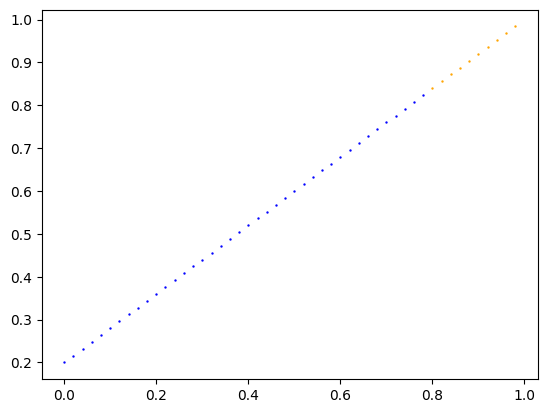

In [ ]:
def display(predictions=None):
  mp.figure(1)
  mp.scatter(X_train,y_train,s=0.5,c="b")
  mp.scatter(X_test,y_test,s=0.5,c="orange")
  try:
    mp.scatter(X_test,predictions, s=0.5, c="green")
  except:
    pass
  mp.show()

display()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.a = nn.Parameter(torch.randn(1,
                                      requires_grad=True,
                                      dtype=torch.double))
    self.b = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.double))

  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.a*x+self.b


In [ ]:
torch.manual_seed(42)
model = LinearRegressionModel()
print(f"{list(model.parameters())}\n {model.state_dict()}\n {a,b}")
#for i in range(len(model.forward(X_test))):
#  print(y_test[i],model.forward(X_test)[i])

[Parameter containing:
tensor([0.3367], dtype=torch.float64, requires_grad=True), Parameter containing:
tensor([0.1288], dtype=torch.float64, requires_grad=True)]
 OrderedDict([('a', tensor([0.3367], dtype=torch.float64)), ('b', tensor([0.1288], dtype=torch.float64))])
 (0.8, 0.2)


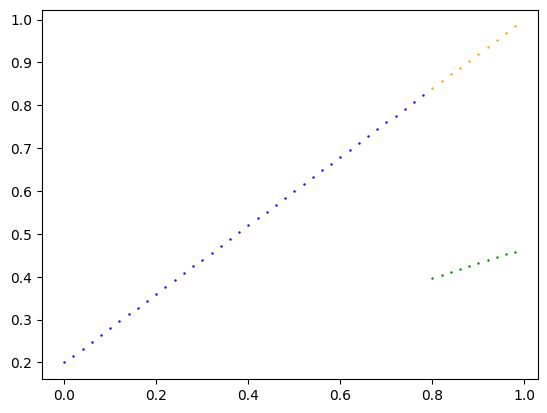

In [ ]:
with torch.inference_mode():
  y_preds = model(X_test)

display(predictions=y_preds)

Maintenant, on cherche à crer une fonction d'erreur, pour mesurer à quel point le modèle est mauvais (ou bon). Ici, on va simplement prendre l'écart absolu moyen = L1 = MAE
On ajoute aussi un optimizer : un algorythme qui réduit la fonction d'erreur.

In [ ]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.001) #Stochastic Gradient Descent ; lr = learning rate

Maintenant, on crée la boucle d'entrainement, puis de test

In [ ]:
list_loss = []
list_epochs = []
list_test_loss = []

[array(0.25188136), array(0.04567943), array(0.01133689), array(0.0007091), array(0.0007091), array(0.0007091), array(0.0007091), array(0.0007091), array(0.0007091), array(0.0007091)]
[array(0.48218909), array(0.10675573), array(0.02643588), array(0.00022968), array(0.00022968), array(0.00022968), array(0.00022968), array(0.00022968), array(0.00022968), array(0.00022968)]
OrderedDict([('a', tensor([0.7992], dtype=torch.float64)), ('b', tensor([0.1996], dtype=torch.float64))])


<Figure size 640x480 with 0 Axes>

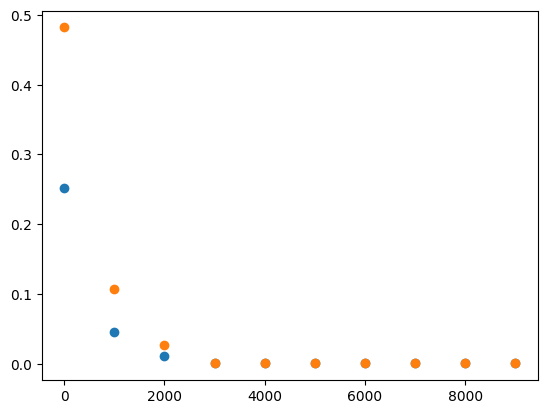

In [ ]:

epochs = 10000

def loop(loop_size=epochs, optimizer=optimizer, loss_fn=loss_fn, model=model):
  for epoch in range(epochs):
    model.train() #train
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval() #test
    with torch.inference_mode():
      test_pred = model(X_test)
      test_loss = loss_fn(test_pred, y_test)

    #Askip c'est mieux de faire un petit rapport de la situation de temps en temps, donc go
      if epoch%(epochs/10)==0:
        list_test_loss.append(np.array(test_loss))
        list_loss.append(np.array(loss))
        list_epochs.append(epoch)

  #Ceci n'est pas dans la boucle, on affiche simplement les trucs intéressants (cool stuff)
  mp.figure(2)
  mp.figure().clear()

  mp.scatter(list_epochs,list_loss)
  mp.scatter(list_epochs,list_test_loss)
  print(list_loss[:10])
  print(list_test_loss[:10])
  print(model.state_dict())


loop()



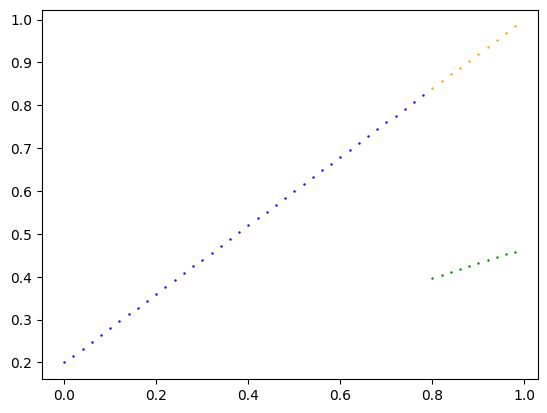

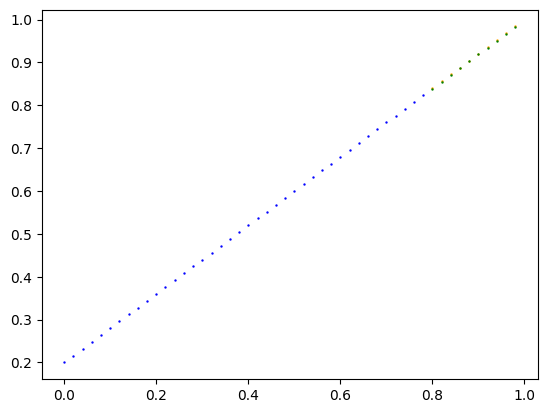

OrderedDict([('a', tensor([0.7992], dtype=torch.float64)), ('b', tensor([0.1996], dtype=torch.float64))])


In [ ]:
with torch.no_grad():
  y_pred = model(X_test)
display(predictions=y_preds)
display(predictions=y_pred)
print(model.state_dict())

In [ ]:

class Ronaldo():
  def __init__(self):
    print("SIUUUU")
ronaldo = Ronaldo()
class SIUUUUUU(Ronaldo):
  def __init__(self):
    super().__init__()
siuuu = SIUUUUUU()

SIUUUU
SIUUUU


###Exercice : reproduire la même chose
Tout ce qui a un rapport avec le le GPU ou la sauvegarde est basé sur un tuto.

In [ ]:
#imports

import torch
import matplotlib.pyplot as plt

import numpy as np
from torch import nn
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

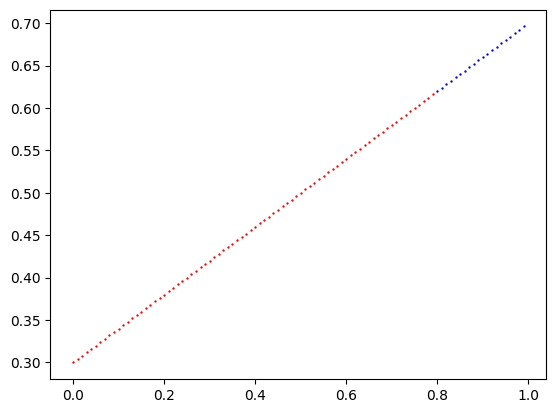

In [ ]:
#créer nos sets de données de départ
a = 0.4
b = 0.3
X = torch.arange(0,1,0.01).unsqueeze(1)
y = a*X+b

#on separe les données de train et les données de test
sample_size = int(X.shape[0]*0.8)
train_X, test_X = X[:sample_size], X[sample_size:]
train_y, test_y = y[:sample_size], y[sample_size:]

#on affiche tout ça
plt.figure(1)
plt.scatter(train_X, train_y, c="r", s=0.5)
plt.scatter(test_X, test_y, c="b", s=0.5)

In [ ]:
seed = 42
torch.manual_seed(seed)
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features=1, out_features=1)
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear1(x)



model = Model()
for i in range(train_X.size()[0]):
  if i%10==0:
    print(model(train_X[i]), train_X[i])

print(model.state_dict())

tensor([0.8300], grad_fn=<AddBackward0>) tensor([0.])
tensor([0.9065], grad_fn=<AddBackward0>) tensor([0.1000])
tensor([0.9829], grad_fn=<AddBackward0>) tensor([0.2000])
tensor([1.0594], grad_fn=<AddBackward0>) tensor([0.3000])
tensor([1.1358], grad_fn=<AddBackward0>) tensor([0.4000])
tensor([1.2123], grad_fn=<AddBackward0>) tensor([0.5000])
tensor([1.2887], grad_fn=<AddBackward0>) tensor([0.6000])
tensor([1.3652], grad_fn=<AddBackward0>) tensor([0.7000])
OrderedDict([('linear1.weight', tensor([[0.7645]])), ('linear1.bias', tensor([0.8300]))])





(OrderedDict([('linear1.weight', tensor([[0.3999]])), ('linear1.bias', tensor([0.3002]))]), 0.4, 0.3)


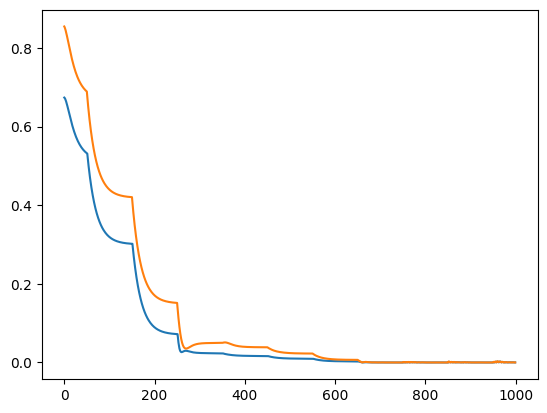

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95) #Ceci est un ajout que j'ai fait moi-même
loss_fn = nn.L1Loss()
epochs = 1000

def loop(epochs=epochs,optimizer=optimizer, loss_fn=loss_fn, scheduler=scheduler):
  epochs_list = []
  loss_list = []
  test_loss_list = []

  for epoch in range(epochs):
    model.train()
    loss = loss_fn(model(train_X),train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()
    model.eval()
    with torch.inference_mode():
      test_loss = loss_fn(model(test_X), test_y)

    if epoch%1==0:
      with torch.no_grad():
        epochs_list.append(epoch)
        loss_list.append(loss.numpy().tolist())
        test_loss_list.append(test_loss.numpy().tolist())

    if epoch%100==50:
      scheduler.step(0)


  plt.figure(2)
  plt.plot(epochs_list, loss_list)
  plt.plot(epochs_list, test_loss_list)


loop()
print(f"\n\n\n{model.state_dict(), a, b}")

In [ ]:
model.state_dict()

OrderedDict([('linear1.weight', tensor([[0.3999]])),
             ('linear1.bias', tensor([0.3002]))])

In [ ]:
loss_fn(model(train_X),train_y)

tensor(0.0001, grad_fn=<MeanBackward0>)

(OrderedDict([('linear1.weight', tensor([[0.3999]])), ('linear1.bias', tensor([0.3002]))]), 0.4, 0.3)


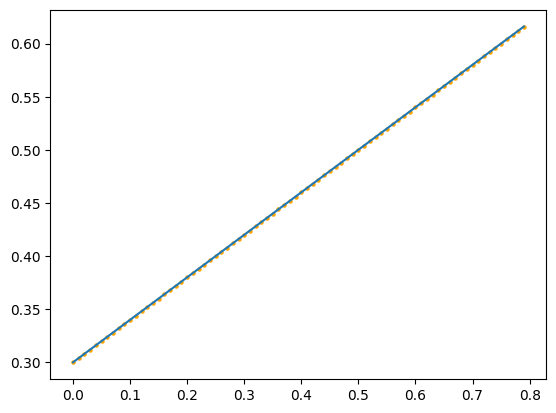

In [ ]:
plt.figure(1)
plt.plot(train_X.detach(), model(train_X).detach())
plt.scatter(train_X.detach(), train_y.detach(), s=5, c="orange")
print(f"{model.state_dict(), a, b}")

In [ ]:

#Créer le chemin d'accès
#MODEL_PATH = Path("/content/drive/MyDrive/Colab_Notebooks/Models")
#MODEL_PATH.mkdir(parents=True, exist_ok=True)

#Créer l'emplacement du modèle
#MODEL_NAME = "01_Second_Model_Straight_Line.pth"
#MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
torch.save(model, "/content/drive/MyDrive/Colab_Notebooks/Models/model.pth")

###Normalement ici on a un modèle à disposition, déjà entrainé. On va simplement le charger à partir d'ici

In [ ]:
import torch
import os
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


class Model(nn.Module): #On charge la classe du modèle avant de pouvoir "load" le modèle sauvegardé

  def __init__(self):
    super().__init__()
    self.liner1 = nn.Linear(in_features=1, out_features=1)
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear1(x)


lmodel = torch.load("/content/drive/MyDrive/Colab_Notebooks/Models/model.pth").to(device)



Mounted at /content/drive
cpu


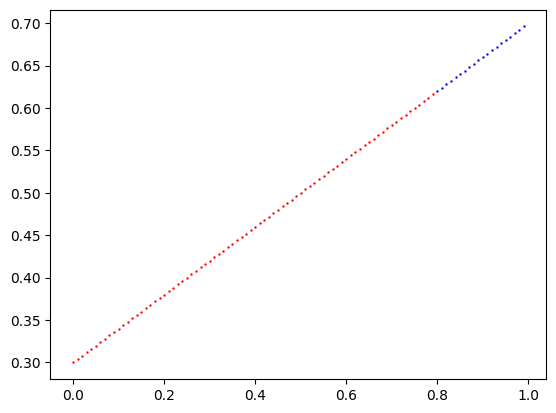

In [ ]:
a = 0.4
b = 0.3
X = torch.arange(0,1,0.01).unsqueeze(1).to(device)
y = a*X+b

#on separe les données de train et les données de test
sample_size = int(X.shape[0]*0.8)
train_X, test_X = X[:sample_size], X[sample_size:]
train_y, test_y = y[:sample_size], y[sample_size:]

#on affiche tout ça
plt.figure(1)
plt.scatter(train_X.cpu(), train_y.cpu(), c="r", s=0.5)
with torch.inference_mode():
  plt.scatter(test_X.cpu(), lmodel(test_X).cpu(), c="b", s=0.5)


In [ ]:
%%time
print(lmodel(train_X))

tensor([[0.3002],
        [0.3042],
        [0.3082],
        [0.3122],
        [0.3162],
        [0.3202],
        [0.3241],
        [0.3281],
        [0.3321],
        [0.3361],
        [0.3401],
        [0.3441],
        [0.3481],
        [0.3521],
        [0.3561],
        [0.3601],
        [0.3641],
        [0.3681],
        [0.3721],
        [0.3761],
        [0.3801],
        [0.3841],
        [0.3881],
        [0.3921],
        [0.3961],
        [0.4001],
        [0.4041],
        [0.4081],
        [0.4121],
        [0.4161],
        [0.4201],
        [0.4241],
        [0.4281],
        [0.4321],
        [0.4361],
        [0.4401],
        [0.4441],
        [0.4481],
        [0.4521],
        [0.4561],
        [0.4601],
        [0.4641],
        [0.4681],
        [0.4721],
        [0.4761],
        [0.4801],
        [0.4841],
        [0.4881],
        [0.4921],
        [0.4961],
        [0.5001],
        [0.5041],
        [0.5081],
        [0.5121],
        [0.5161],
        [0